In [10]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

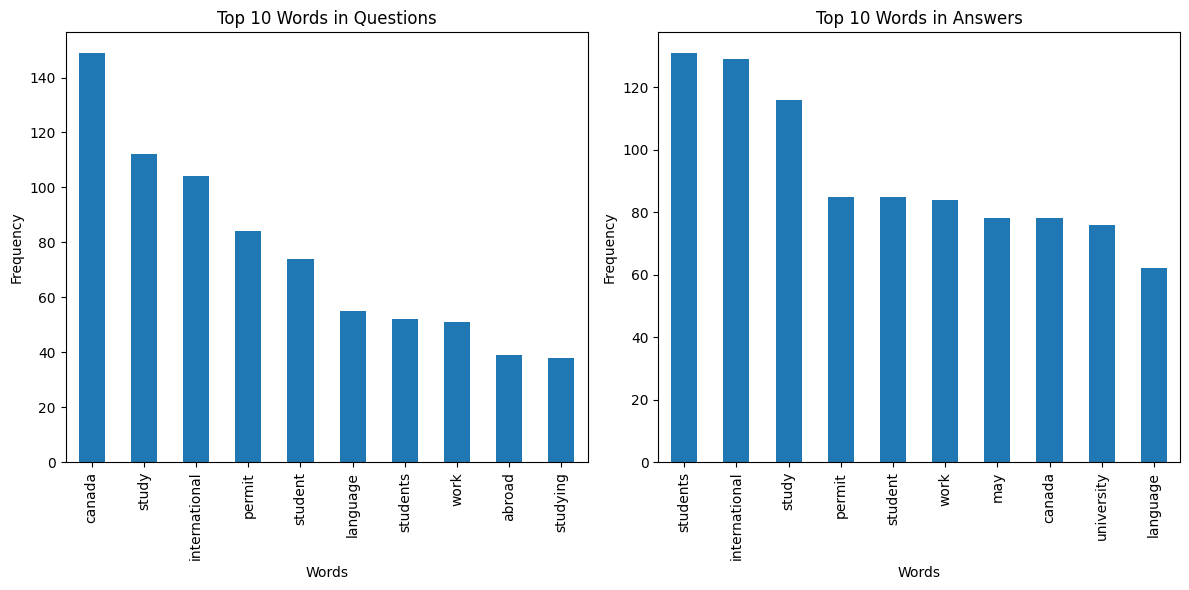

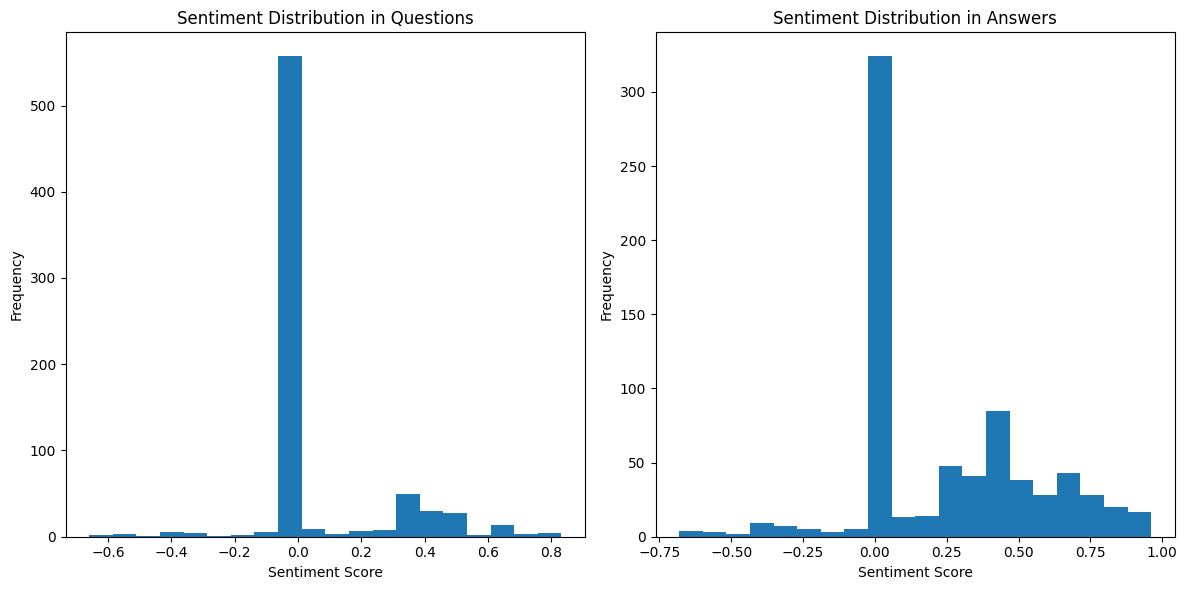

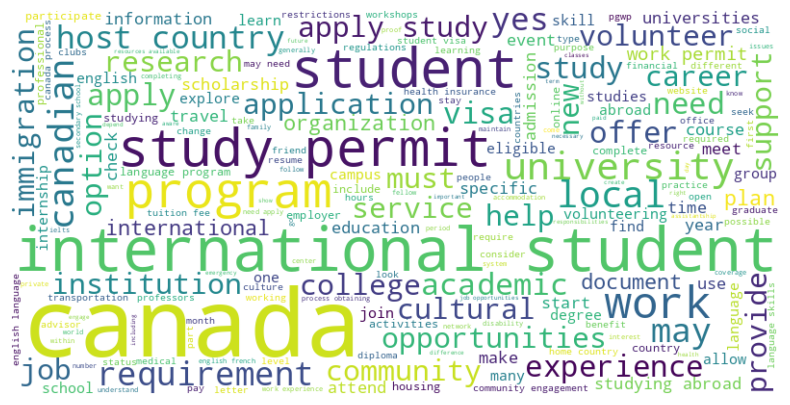

In [13]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('data.xlsx')

# Define a function for text preprocessing
def preprocess_text(text):
    if pd.notnull(text):
        stop_words = set(stopwords.words('english'))
        words = word_tokenize(text.lower())
        words = [word for word in words if word.isalnum() and word not in stop_words]
        return ' '.join(words)
    else:
        return ''

# Apply preprocessing to both columns
df['question'] = df['question'].apply(preprocess_text)
df['answer'] = df['answer'].apply(preprocess_text)

# Word Frequency Analysis
question_words = ' '.join(df['question']).split()
answer_words = ' '.join(df['answer']).split()

question_word_freq = pd.Series(question_words).value_counts().head(10)
answer_word_freq = pd.Series(answer_words).value_counts().head(10)

# Sentiment Analysis
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

df['question_sentiment'] = df['question'].apply(get_sentiment)
df['answer_sentiment'] = df['answer'].apply(get_sentiment)

# Plots
plt.figure(figsize=(12, 6))

# Word Frequency Plots
plt.subplot(1, 2, 1)
question_word_freq.plot(kind='bar', title='Top 10 Words in Questions')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
answer_word_freq.plot(kind='bar', title='Top 10 Words in Answers')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Sentiment Distribution Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['question_sentiment'].plot(kind='hist', bins=20, title='Sentiment Distribution in Questions')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['answer_sentiment'].plot(kind='hist', bins=20, title='Sentiment Distribution in Answers')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(question_words + answer_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


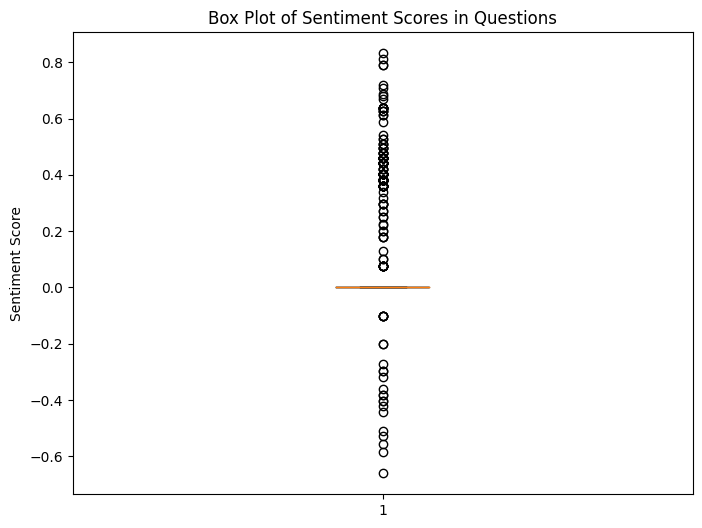

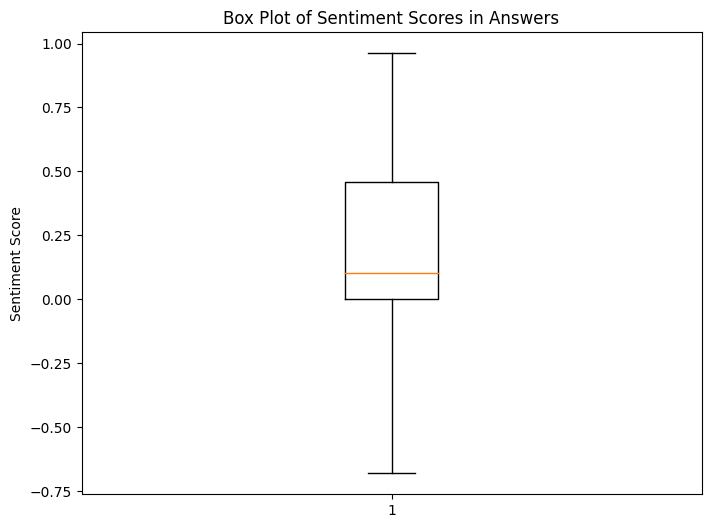

In [20]:
# Box plot for sentiment scores in questions
plt.figure(figsize=(8, 6))
plt.boxplot(df['question_sentiment'])
plt.title('Box Plot of Sentiment Scores in Questions')
plt.ylabel('Sentiment Score')
plt.show()

# Box plot for sentiment scores in answers
plt.figure(figsize=(8, 6))
plt.boxplot(df['answer_sentiment'])
plt.title('Box Plot of Sentiment Scores in Answers')
plt.ylabel('Sentiment Score')
plt.show()


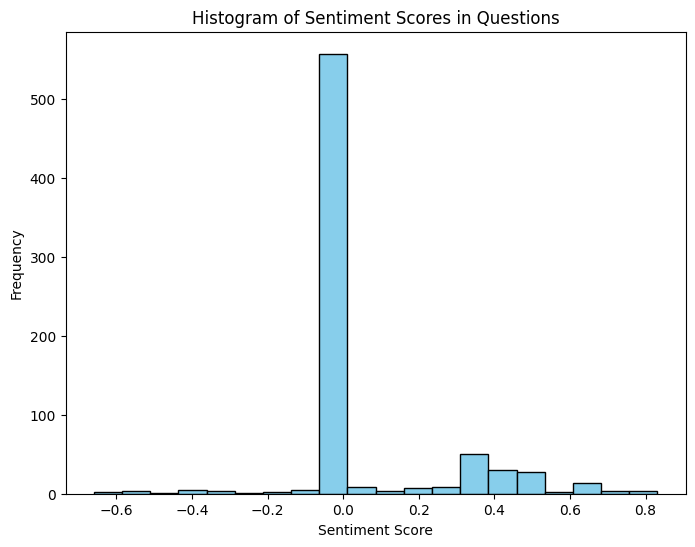

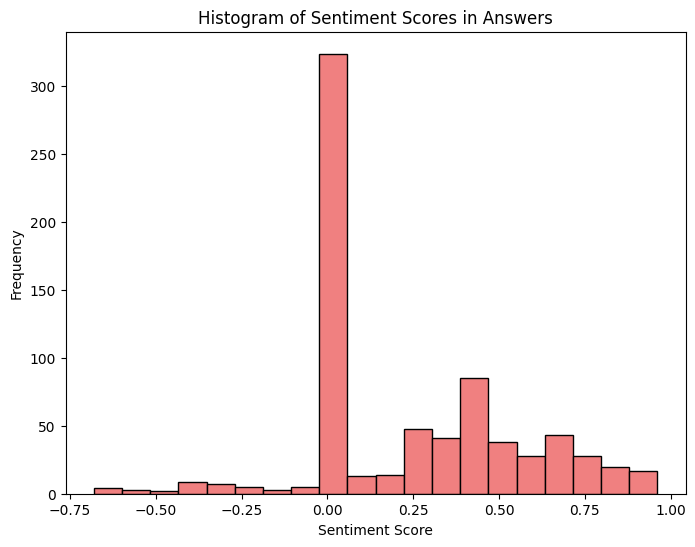

In [21]:
# Histogram for sentiment scores in questions
plt.figure(figsize=(8, 6))
plt.hist(df['question_sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Sentiment Scores in Questions')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Histogram for sentiment scores in answers
plt.figure(figsize=(8, 6))
plt.hist(df['answer_sentiment'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of Sentiment Scores in Answers')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


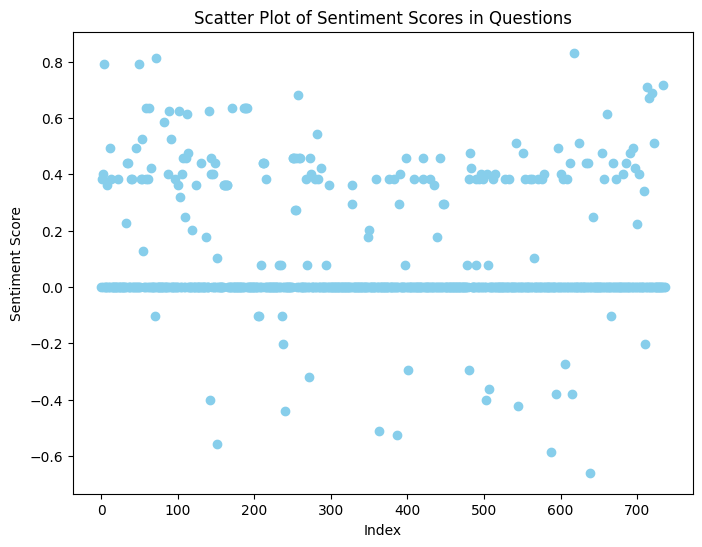

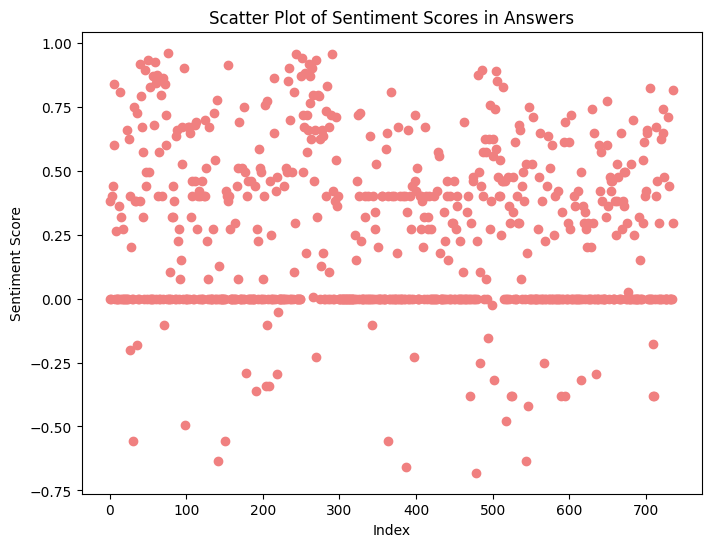

In [22]:
# Scatter plot for sentiment scores in questions
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['question_sentiment'], color='skyblue')
plt.title('Scatter Plot of Sentiment Scores in Questions')
plt.xlabel('Index')
plt.ylabel('Sentiment Score')
plt.show()

# Scatter plot for sentiment scores in answers
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['answer_sentiment'], color='lightcoral')
plt.title('Scatter Plot of Sentiment Scores in Answers')
plt.xlabel('Index')
plt.ylabel('Sentiment Score')
plt.show()


In [23]:
# Calculate the length of questions and answers
df['question_length'] = df['question'].apply(len)
df['answer_length'] = df['answer'].apply(len)

# Calculate correlation between question length and sentiment score
question_sentiment_corr = df['question_length'].corr(df['question_sentiment'])

# Calculate correlation between answer length and sentiment score
answer_sentiment_corr = df['answer_length'].corr(df['answer_sentiment'])

print(f"Correlation between question length and sentiment score: {question_sentiment_corr}")
print(f"Correlation between answer length and sentiment score: {answer_sentiment_corr}")


Correlation between question length and sentiment score: 0.30910730481597287
Correlation between answer length and sentiment score: 0.34752613485690537


In [25]:
# Summary statistics for sentiment scores
question_sentiment_stats = df['question_sentiment'].describe()
answer_sentiment_stats = df['answer_sentiment'].describe()

# Summary statistics for question and answer lengths
question_length_stats = df['question_length'].describe()
answer_length_stats = df['answer_length'].describe()

print("Summary Statistics for Question Sentiment Scores:")
print(question_sentiment_stats)

print("\nSummary Statistics for Answer Sentiment Scores:")
print(answer_sentiment_stats)

print("\nSummary Statistics for Question Lengths:")
print(question_length_stats)

print("\nSummary Statistics for Answer Lengths:")
print(answer_length_stats)


Summary Statistics for Question Sentiment Scores:
count    737.000000
mean       0.076711
std        0.197838
min       -0.659700
25%        0.000000
50%        0.000000
75%        0.000000
max        0.831600
Name: question_sentiment, dtype: float64

Summary Statistics for Answer Sentiment Scores:
count    737.000000
mean       0.233577
std        0.314811
min       -0.680800
25%        0.000000
50%        0.102700
75%        0.458800
max        0.961800
Name: answer_sentiment, dtype: float64

Summary Statistics for Question Lengths:
count    737.000000
mean      32.385346
std       26.989746
min        0.000000
25%        4.000000
50%       31.000000
75%       50.000000
max      195.000000
Name: question_length, dtype: float64

Summary Statistics for Answer Lengths:
count    737.000000
mean      88.663501
std       58.902191
min        0.000000
25%       51.000000
50%       69.000000
75%      113.000000
max      419.000000
Name: answer_length, dtype: float64
